<h1> Ab hier unser Model </h1>

In [1]:
# Import the needed libraries
import numpy as np  
import pandas as pd  
import tensorflow as tf  
import urllib.request as request  
import matplotlib.pyplot as plt

# Download dataset
IRIS_TRAIN_URL = "churn-train.csv"  
IRIS_TEST_URL = "churn-test.csv"

names = ['timezone_cd', 'tenure_visit', 'branch', 'abc_cd', 'abc_detailed_cd', 'avg_no_main_cat_1y', 'avg_no_main_cat_q1', 'avg_no_main_cat_q2', 'avg_no_main_cat_th', 'avg_no_main_cat_lh', 'avg_articles_6_6', 'avg_articles_q1_q2', 'churn_flag', 'ret_visits_per_chg_q1_q2', 'ret_sales_per_chg_q1_q2', 'visit_gap_ratio_th', 'visit_gap_ratio_1y', 'visit_gap_ratio_per_chg_6_6', 'avg_days_between_visits', 'home_st_visits_per_q1', 'home_st_visits_per_6_6', 'basket_spend', 'basket_spend_per_chg_6_6', 'basket_spend_per_chg_q1_q2', 'f_sales_per_chg_6_6', 'nf_visits_per_chg_6_6', 'nf_sales_per_chg_6_6', 'p_visits_per_chg_6_6', 'p_sales_per_chg_6_6', 'ret_visits_per_chg_6_6', 'ret_sales_per_chg_6_6', 'f_visits_per_chg_q1_q2', 'nf_visits_per_chg_q1_q2', 'nf_sales_per_chg_q1_q2', 'p_visits_per_chg_q1_q2', 'p_sales_per_chg_q1_q2', 'consistency_mnth_cd', 'consistency_qtr_cd', 'distinct_weeks_bought', 'expect_visit_flag', 'expect_visit_flag2', 'promo_sales_per', 'margin_per', 'food_sales_per', 'food_promo_per', 'nf_promo_per', 'food_colli_per', 'food_pieces_per', 'sales_last_model_period_per', 'visits_last_model_period_per', 'distinct_stores', 'recency', 'margin_1y', 'home_visits_q1', 'home_visits_lh', 'home_visits_th', 'visit_gap_th', 'visit_gap_lh', 'visit_gap_1y', 'promo_sales_1y', 'promo_sales_q1', 'promo_sales_q2', 'promo_sales_th', 'promo_sales_lh', 'nf_promo_sales', 'food_promo_sales', 'promo_visits_q1', 'promo_visits_q2', 'promo_visits_th', 'promo_visits_lh', 'promo_visits_1y', 'nf_sales_1y', 'nf_sales_q1', 'nf_sales_q2', 'nf_sales_th', 'nf_sales_lh', 'nf_visits_q1', 'nf_visits_q2', 'nf_visits_th', 'nf_visits_lh', 'food_sales_1y', 'food_sales_th', 'food_sales_lh', 'food_visits_1y', 'food_visits_q1', 'food_visits_q2', 'pieces', 'food_colli', 'food_pieces', 'colli_1y', 'colli_q1', 'home_store_visits_q1', 'home_store_visits_th', 'home_store_visits_lh', 'visits_q1', 'visits_q2', 'visits_q3', 'visits_q4', 'visits_1y', 'visits_th', 'visits_lh', 'sales_1y', 'sales_q1', 'sales_q2', 'sales_q3', 'sales_q4', 'sales_th', 'sales_lh', 'ret_visits_q1', 'ret_visits_q2', 'ret_visits_th', 'ret_visits_lh', 'ret_sales_q1', 'ret_sales_q2', 'ret_sales_th', 'ret_sales_lh', 'ret_sales_1y', 'prediction_week']  
train = pd.read_csv(IRIS_TRAIN_URL, names=names, skiprows=0)  
test = pd.read_csv(IRIS_TEST_URL, names=names, skiprows=0)

print(test.head())

# Train and test input data
Xtrain = train.drop("churn_flag", axis=1)  
Xtest = test.drop("churn_flag", axis=1)

# Encode target values into binary ('one-hot' style) representation
ytrain = pd.get_dummies(train.churn_flag)  
ytest = pd.get_dummies(test.churn_flag)  

/usr/local/envs/py2env/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


   timezone_cd  tenure_visit  branch  abc_cd  abc_detailed_cd  \
0        0.000      1.000000     0.0     0.0         0.285714   
1        0.000      0.813187     0.0     1.0         1.000000   
2        0.375      0.983516     0.0     1.0         1.000000   
3        0.625      0.986264     0.0     1.0         1.000000   
4        0.375      0.989011     0.5     1.0         1.000000   

   avg_no_main_cat_1y  avg_no_main_cat_q1  avg_no_main_cat_q2  \
0            0.220991            0.140845            0.213134   
1            0.150439            0.149899            0.145183   
2            0.149277            0.140017            0.125800   
3            0.299145            0.239437            0.280597   
4            0.203855            0.176056            0.168722   

   avg_no_main_cat_th  avg_no_main_cat_lh       ...         ret_visits_q1  \
0            0.210468            0.180300       ...              0.000000   
1            0.161983            0.100444       ...             

In [2]:
# Create and train a tensorflow model of a neural network
def create_train_model(hidden_nodes, num_iters):

    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(365754, 117), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(365754, 2), dtype=tf.float64, name='y')
    
    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(117, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 2), dtype=tf.float64)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))
    
    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        print(i)
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

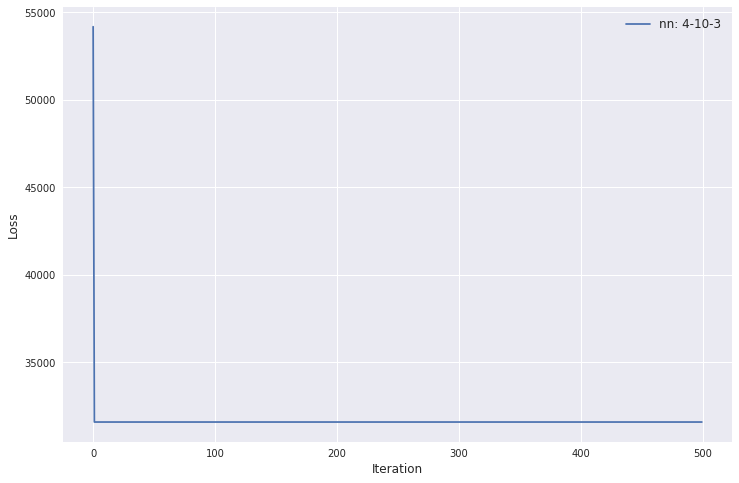

In [6]:
# Run the training for 3 different network architectures: (4-5-3) (4-10-3) (4-20-3)

# Plot the loss function over iterations
num_hidden_nodes = [10]#, 10, 20]
loss_plot = {10: []}#, 10: [], 20: []}  
weights1 = {10: None}#, 10: None, 20: None}  
weights2 = {10: None}#, 10: None, 20: None}  
num_iters = 500

plt.figure(figsize=(12,8))  
for hidden_nodes in num_hidden_nodes:  
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 4-%d-3" % hidden_nodes)

plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 

In [4]:
# Evaluate models on the test set
X = tf.placeholder(shape=(121918, 117), dtype=tf.float64, name='X')  
y = tf.placeholder(shape=(121918, 2), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    # Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 50-%d-40, accuracy: %.2f%%' % (hidden_nodes, accuracy))

Network architecture 50-70-40, accuracy: 4.00%
